In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### Выведем полученные данные после парсинга:

In [2]:
df = pd.read_excel('final_table1.xlsx')
df = df.drop('Column1',axis=1)
df.head()

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2-к. квартира,"62,5 м²",6,10 эт.,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201 500 ₽ за м²
1,Своб. планировка,"52,1 м²",1,24 эт.,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344 700 ₽ за м²
2,1-к. квартира,30 м²,14,30 эт.,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313 333 ₽ за м²
3,2-к. квартира,"89,7 м²",3,16 эт.,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315 379 ₽ за м²
4,2-к. квартира,"52,8 м²",5,14 эт.,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227 273 ₽ за м²


### Мы получили количественные показатели: м^2, этаж, этажей в доме, цена квартиры, цена за м^2 и качественные: тип квартиры, адресс, станция метро, окна, новостройка.

### Избавимся от дубликатов

In [3]:
df.drop_duplicates(inplace = True)
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2-к. квартира,"62,5 м²",6,10 эт.,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201 500 ₽ за м²
1,Своб. планировка,"52,1 м²",1,24 эт.,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344 700 ₽ за м²
2,1-к. квартира,30 м²,14,30 эт.,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313 333 ₽ за м²
3,2-к. квартира,"89,7 м²",3,16 эт.,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315 379 ₽ за м²
4,2-к. квартира,"52,8 м²",5,14 эт.,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227 273 ₽ за м²
...,...,...,...,...,...,...,...,...,...,...,...,...
4896,2-к. квартира,"37,4 м²",1,12 эт.,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256 684 ₽ за м²
4914,1-к. квартира,41 м²,13,14 эт.,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248 537 ₽ за м²
4922,2-к. квартира,"55,5 м²",8,10 эт.,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365 766 ₽ за м²
4931,1-к. квартира,36 м²,12,14 эт.,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275 000 ₽ за м²


## Преобразование типов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3660 entries, 0 to 4947
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Тип квартиры               3660 non-null   object 
 1   м^2                        3660 non-null   object 
 2   Этаж                       3660 non-null   int64  
 3   Этажей в доме              3660 non-null   object 
 4   Адресс                     3660 non-null   object 
 5   Станция метро              3603 non-null   object 
 6   Окна во двор               3660 non-null   int64  
 7   Окна на улицу              3660 non-null   int64  
 8   Окна на солнечную сторону  3660 non-null   int64  
 9   Новостройка                3660 non-null   int64  
 10  Цена квартиры              3646 non-null   float64
 11  Цена за м^2                3660 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 371.7+ KB


### Удалим нечисловые символы в столбцах с количественными показателями:

In [5]:
df['Этажей в доме'] = df['Этажей в доме'].str.replace(r"['эт.']",'',regex = True)
df['м^2'] = df['м^2'].str.replace(r"[м²]",'',regex = True).str.replace(r"[',']",'.',regex = True)
df['Цена за м^2'] = df['Цена за м^2'].str.replace(r"[₽ за м²]",'',regex = True)
df.head()

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2-к. квартира,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,Своб. планировка,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1-к. квартира,30,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2-к. квартира,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2-к. квартира,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273


### Заменим значения для признака "тип квартиры":

In [6]:
df = df.replace({'Тип квартиры':{'Квартира-студия':0,
                                 '1-к. квартира':1,
                                 '2-к. квартира':2,
                                 '3-к. квартира':3,
                                 '4-к. квартира':4,
                                 '5-к. квартира':5,
                                 '6-к. квартира':6,
                                 '7-к. квартира':7,
                                 'Апартаменты-студия':8,
                                 '1-к. апартаменты':9,
                                 '2-к. апартаменты':10,
                                 '3-к. апартаменты':11,
                                 '4-к. апартаменты':12,
                                 '5-к. апартаменты':13,
                                 'Аукцион: квартира-студия':14,
                                 'Аукцион: 1-к. квартира':15,
                                 'Аукцион: 2-к. квартира':16,
                                 'Аукцион: 3-к. квартира':17,
                                 'Аукцион: 4-к. квартира':18,
                                 'Доля в квартира-студии':19,
                                 'Доля в 1-к. квартире':20,
                                 'Доля в 2-к. квартире':21,
                                 'Доля в 3-к. квартире':22,
                                 'Доля в 4-к. квартире':23,
                                 'Своб. планировка':24,}})
df.head()

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,24,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1,30,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273


In [7]:
df['Тип квартиры'] = df['Тип квартиры'].astype(int)
df['Этажей в доме'] = df['Этажей в доме'].astype(int)
df['Цена за м^2'] = df['Цена за м^2'].astype(int)
df['м^2'] = df['м^2'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3660 entries, 0 to 4947
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Тип квартиры               3660 non-null   int32  
 1   м^2                        3660 non-null   float64
 2   Этаж                       3660 non-null   int64  
 3   Этажей в доме              3660 non-null   int32  
 4   Адресс                     3660 non-null   object 
 5   Станция метро              3603 non-null   object 
 6   Окна во двор               3660 non-null   int64  
 7   Окна на улицу              3660 non-null   int64  
 8   Окна на солнечную сторону  3660 non-null   int64  
 9   Новостройка                3660 non-null   int64  
 10  Цена квартиры              3646 non-null   float64
 11  Цена за м^2                3660 non-null   int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 328.8+ KB


## Удаление некоторых данных

### Посмотрим на то, сколько у нас квартир того или иного типа:

In [8]:
df['Тип квартиры'].value_counts()

Тип квартиры
2     1125
1      817
0      596
3      594
8      162
4      106
10      88
9       67
11      28
24      18
5       13
21       9
6        7
16       6
22       5
15       4
7        3
17       3
12       2
13       2
23       2
19       1
14       1
20       1
Name: count, dtype: int64

***Мы видим, что типам квартир с 14 по 23 (аукцион и доля в квартире) у нас соответствует довольно небольшое количество строк (32 из 3660). То есть менее 1%. Давайте уберем эти данные, т.к. у аукционных квартир вообще нет итоговой цены, что неудобно для нашего анализа, а у квартир, где покупается только доля, даже не указана эта доля (к тому же, это не полноценная квартира).***

In [9]:
df = df[(df['Тип квартиры'] < 14) | (df['Тип квартиры'] > 23)]
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,24,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273
...,...,...,...,...,...,...,...,...,...,...,...,...
4896,2,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684
4914,1,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537
4922,2,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766
4931,1,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3628 entries, 0 to 4947
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Тип квартиры               3628 non-null   int32  
 1   м^2                        3628 non-null   float64
 2   Этаж                       3628 non-null   int64  
 3   Этажей в доме              3628 non-null   int32  
 4   Адресс                     3628 non-null   object 
 5   Станция метро              3571 non-null   object 
 6   Окна во двор               3628 non-null   int64  
 7   Окна на улицу              3628 non-null   int64  
 8   Окна на солнечную сторону  3628 non-null   int64  
 9   Новостройка                3628 non-null   int64  
 10  Цена квартиры              3628 non-null   float64
 11  Цена за м^2                3628 non-null   int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 326.0+ KB


***При этом, теперь у нас нет пропущенных значений в "Цене квартиры", т.к. мы убрали все аукционные квартиры. Заменим тип квартиры 24 на 14, чтобы не было путанницы***

In [11]:
df.loc[df['Тип квартиры'] == 24, 'Тип квартиры'] = 14
df = df.reset_index(drop = True)

In [12]:
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,14,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273
...,...,...,...,...,...,...,...,...,...,...,...,...
3623,2,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684
3624,1,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537
3625,2,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766
3626,1,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000


In [13]:
df.isna().sum() ### видим, что есть пропуски в столбце "станция метро"

Тип квартиры                  0
м^2                           0
Этаж                          0
Этажей в доме                 0
Адресс                        0
Станция метро                57
Окна во двор                  0
Окна на улицу                 0
Окна на солнечную сторону     0
Новостройка                   0
Цена квартиры                 0
Цена за м^2                   0
dtype: int64

In [14]:
#пропуски в столбце "станция метро" заменим на "не указано".
df.fillna({'Станция метро':"Не указано"},inplace=True)

df.isna().sum()

Тип квартиры                 0
м^2                          0
Этаж                         0
Этажей в доме                0
Адресс                       0
Станция метро                0
Окна во двор                 0
Окна на улицу                0
Окна на солнечную сторону    0
Новостройка                  0
Цена квартиры                0
Цена за м^2                  0
dtype: int64

### Разделим 'Тип квариры' на 2 колонки, где тип квартиры - квартира (0) или апартаменты (1), а число комнат - это число комнат hd

In [15]:
df['Число комнат'] = df['Тип квартиры']

df.loc[df['Тип квартиры'] >= 8, 'Число комнат'] = df['Тип квартиры'] - 8
df.loc[df['Тип квартиры'] == 14, 'Число комнат'] = 1 # так как это - свободная планировка

df.loc[df['Тип квартиры'] < 8, 'Тип квартиры'] = 0
df.loc[df['Тип квартиры'] == 14, 'Тип квартиры'] = 0
df.loc[df['Тип квартиры'] >= 8, 'Тип квартиры'] = 1

df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2,Число комнат
0,0,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500,2
1,0,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700,1
2,0,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333,1
3,0,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379,2
4,0,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,0,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684,2
3624,0,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537,1
3625,0,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766,2
3626,0,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000,1


## Поиск и обработка выбросов

In [16]:
numeric_columns = ['м^2','Этаж','Этажей в доме','Цена квартиры','Цена за м^2', 'Число комнат']
df[numeric_columns].describe()

,м^2,Этаж,Этажей в доме,Цена квартиры,Цена за м^2,Число комнат
count,3628.000000,3628.000000,3628.000000,3.628000e+03,3.628000e+03,3628.000000
mean,49.484454,9.774807,19.776185,1.574217e+07,2.967697e+05,1.588754
std,29.096594,8.456134,10.694910,2.252589e+07,1.240452e+05,1.137915
min,10.000000,1.000000,1.000000,2.090000e+06,7.934800e+04,0.000000
25%,32.300000,3.000000,10.000000,8.400000e+06,2.333330e+05,1.000000
50%,44.000000,7.000000,17.000000,1.174241e+07,2.743935e+05,2.000000
75%,61.900000,14.000000,30.000000,1.687932e+07,3.274142e+05,2.000000
max,418.000000,81.000000,95.000000,8.745900e+08,3.809190e+06,7.000000


### Построим гистограммы:

array([[<Axes: title={'center': 'м^2'}>,
        <Axes: title={'center': 'Этаж'}>],
       [<Axes: title={'center': 'Этажей в доме'}>,
        <Axes: title={'center': 'Цена квартиры'}>],
       [<Axes: title={'center': 'Цена за м^2'}>,
        <Axes: title={'center': 'Число комнат'}>]], dtype=object)

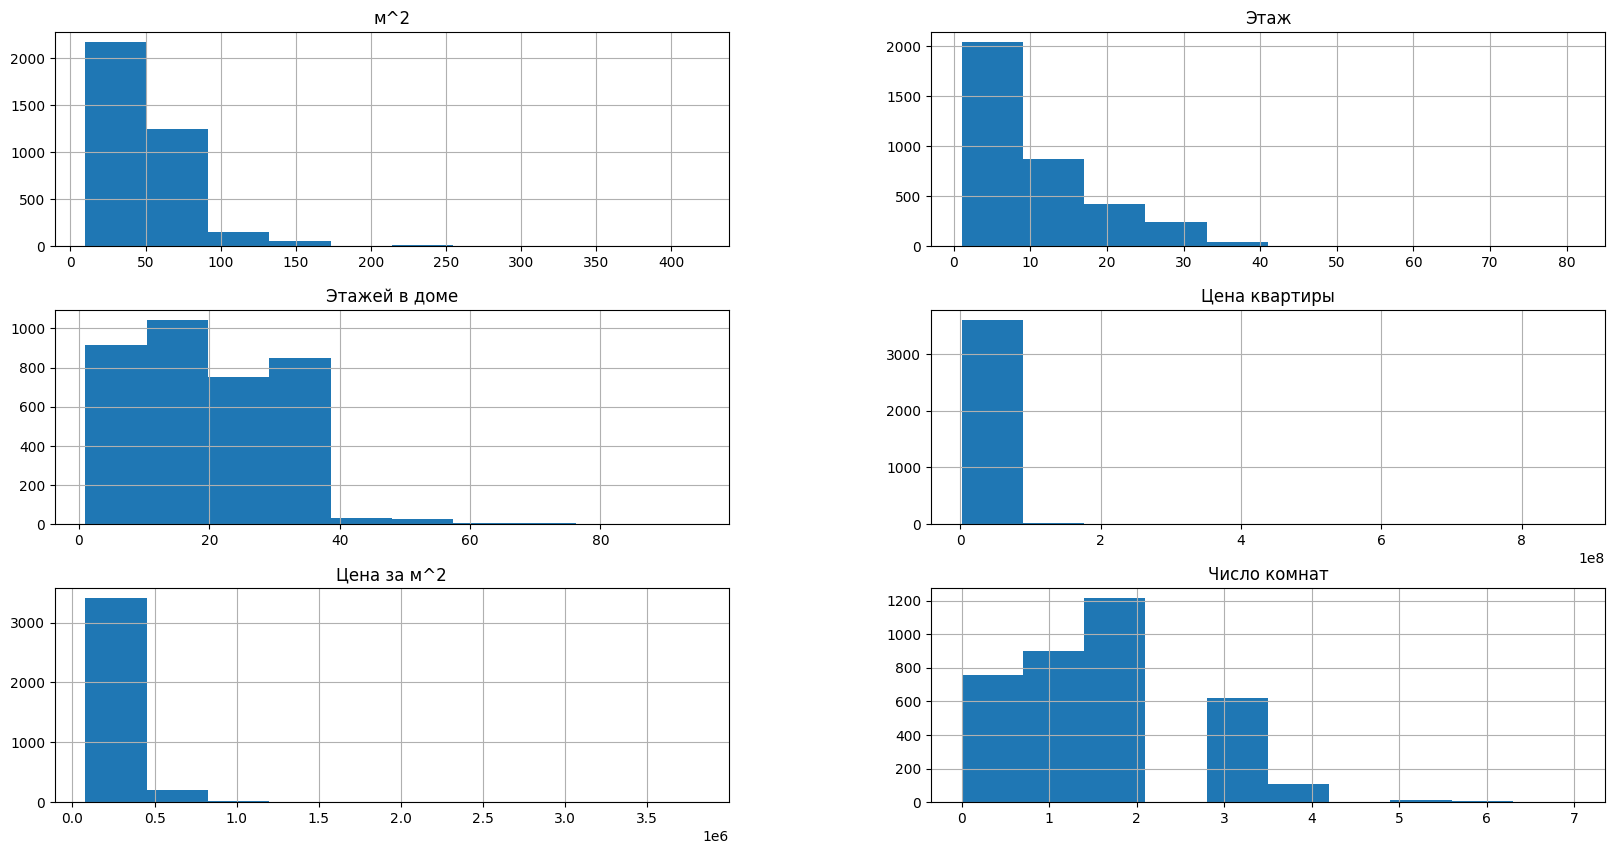

In [17]:
df[numeric_columns].hist(figsize=(20, 10))

***Видим, что в некоторых данных присутствуют хвосты. Прологорифмируем.***

array([[<Axes: title={'center': 'м^2'}>,
        <Axes: title={'center': 'Этаж'}>],
       [<Axes: title={'center': 'Этажей в доме'}>,
        <Axes: title={'center': 'Цена квартиры'}>],
       [<Axes: title={'center': 'Цена за м^2'}>,
        <Axes: title={'center': 'Число комнат'}>]], dtype=object)

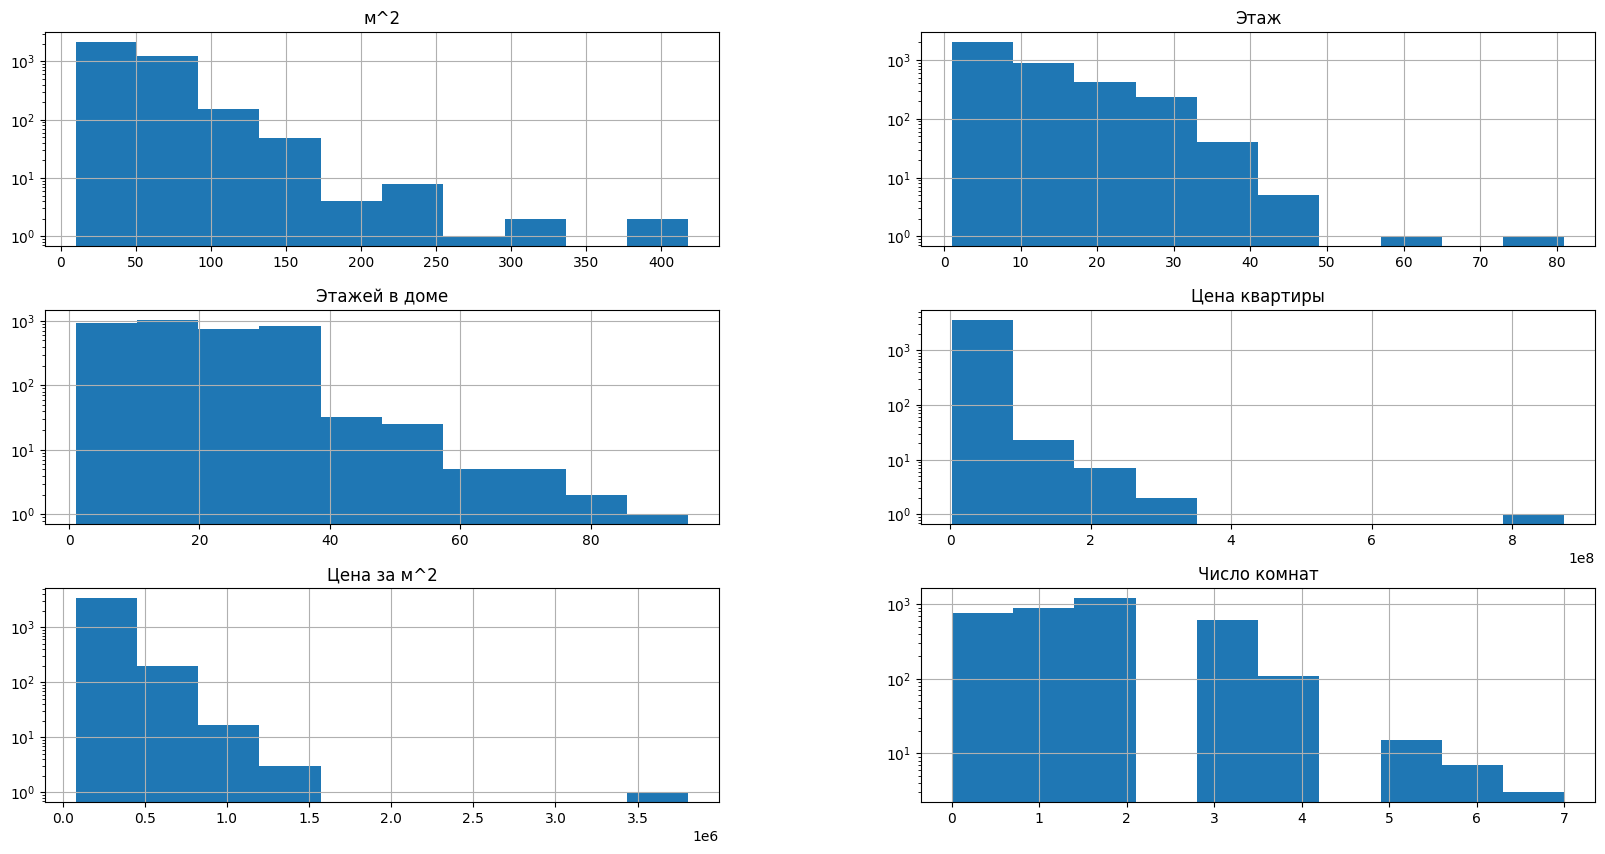

In [18]:
df[numeric_columns].hist(figsize=(20, 10), log=True)

***Почти во всех колонках у нас присутствуют анамальные значения. Посмотрим на зависимость цены квартиры от количественных показателей.***

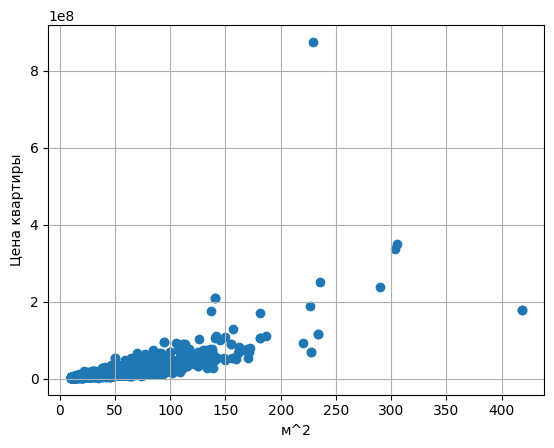

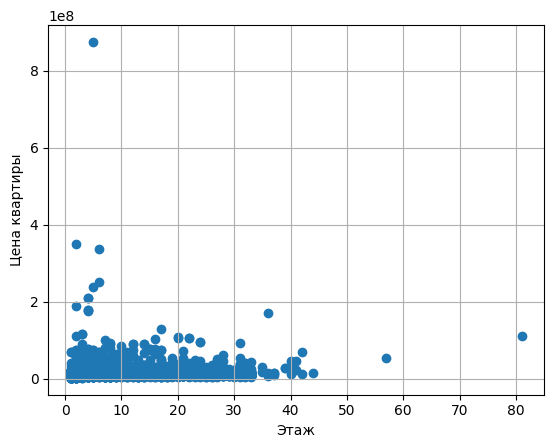

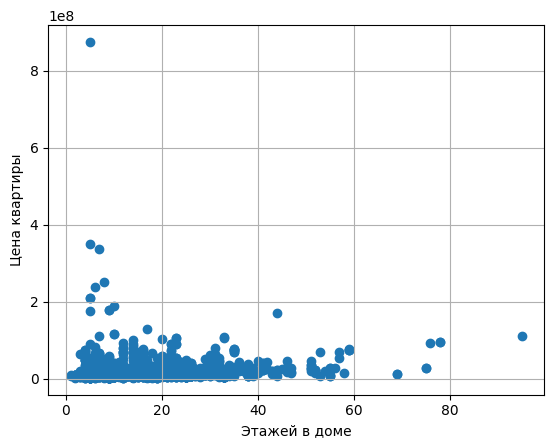

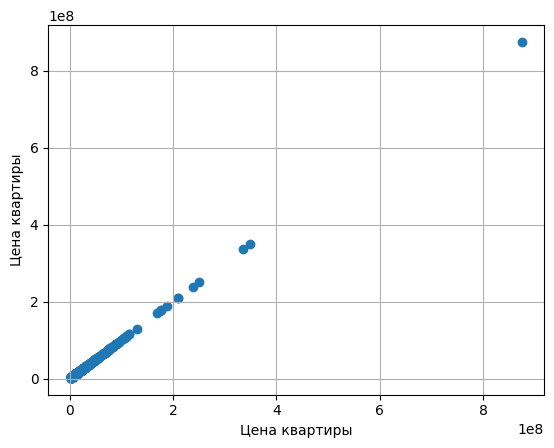

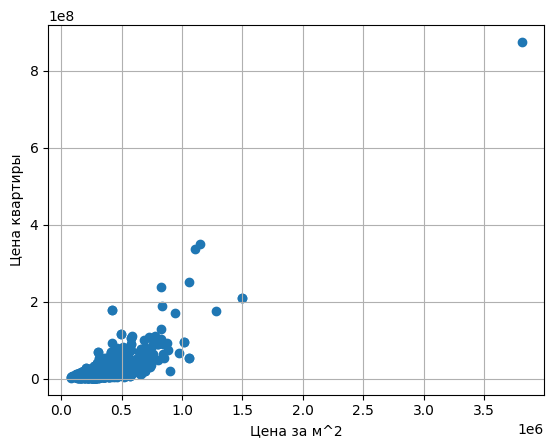

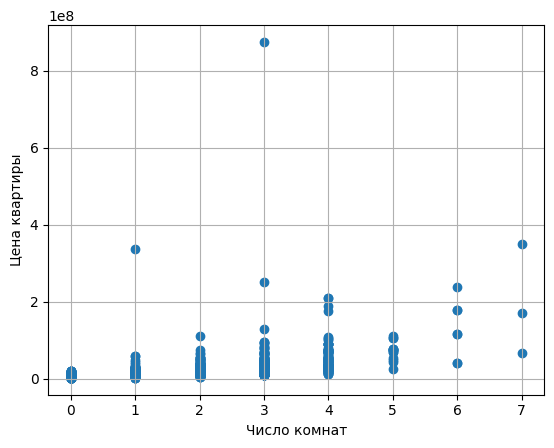

In [19]:
# Исследуем зависимость цены квартиры от количественных показателей
y = df['Цена квартиры']
for n in numeric_columns:
    x = df[n]
    plt.scatter(x,y)
    plt.xlabel(n)
    plt.ylabel('Цена квартиры')
    plt.grid()
    plt.show()

***На всех этих графиках можно заметить выбросы. Попробуем убрать их.***

In [20]:
def outlier_std(data, col, threshold = 3):
    mean = data[col].mean()
    std = data[col].std()
    
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col] > up_bound, data[col] < low_bound], axis = 1).any(axis=1)
    return anomalies, up_bound, low_bound

In [21]:
a, l, r = outlier_std(df, numeric_columns)
a.value_counts()

False    3497
True      131
Name: count, dtype: int64

In [22]:
df['Аномалия'] = a
df_2 = df[df['Аномалия'] != True]
df_2

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2,Число комнат,Аномалия
0,0,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500,2,False
1,0,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700,1,False
2,0,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333,1,False
3,0,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379,2,False
4,0,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,0,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684,2,False
3624,0,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537,1,False
3625,0,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766,2,False
3626,0,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000,1,False


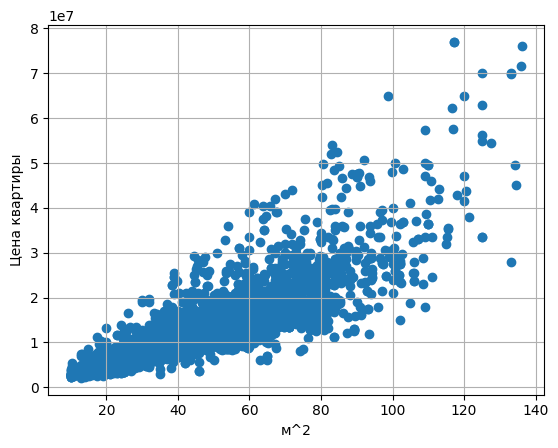

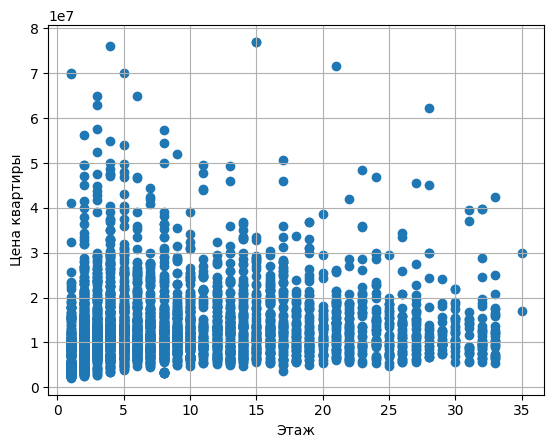

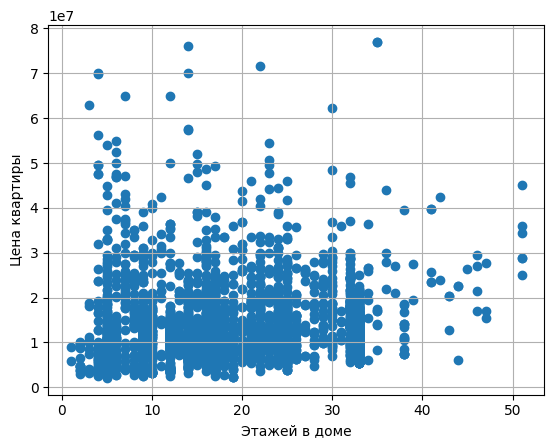

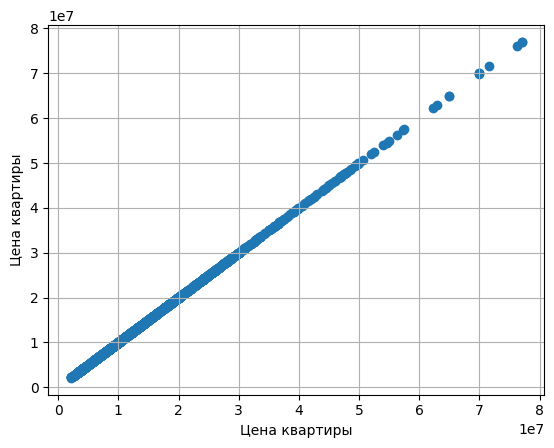

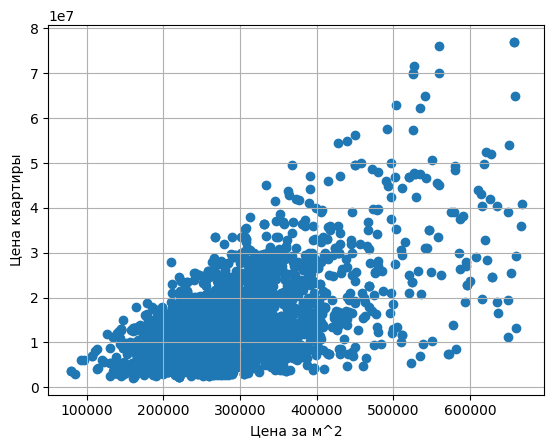

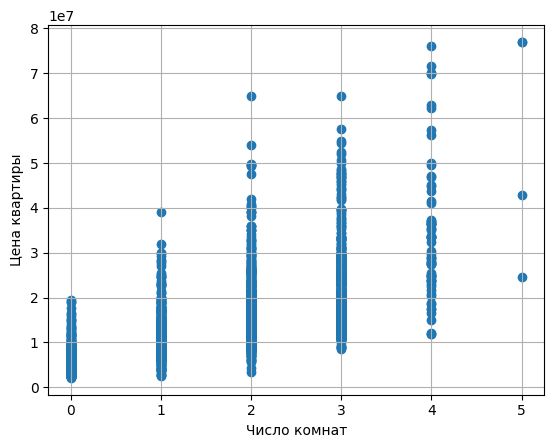

In [23]:
# Снова исследуем зависимость цены квартиры от количественных показателей
y = df_2['Цена квартиры']
for m in numeric_columns:
    x = df_2[m]
    plt.scatter(x,y)
    plt.xlabel(m)
    plt.ylabel('Цена квартиры')
    plt.grid()
    plt.show()

array([[<Axes: title={'center': 'м^2'}>,
        <Axes: title={'center': 'Этаж'}>],
       [<Axes: title={'center': 'Этажей в доме'}>,
        <Axes: title={'center': 'Цена квартиры'}>],
       [<Axes: title={'center': 'Цена за м^2'}>,
        <Axes: title={'center': 'Число комнат'}>]], dtype=object)

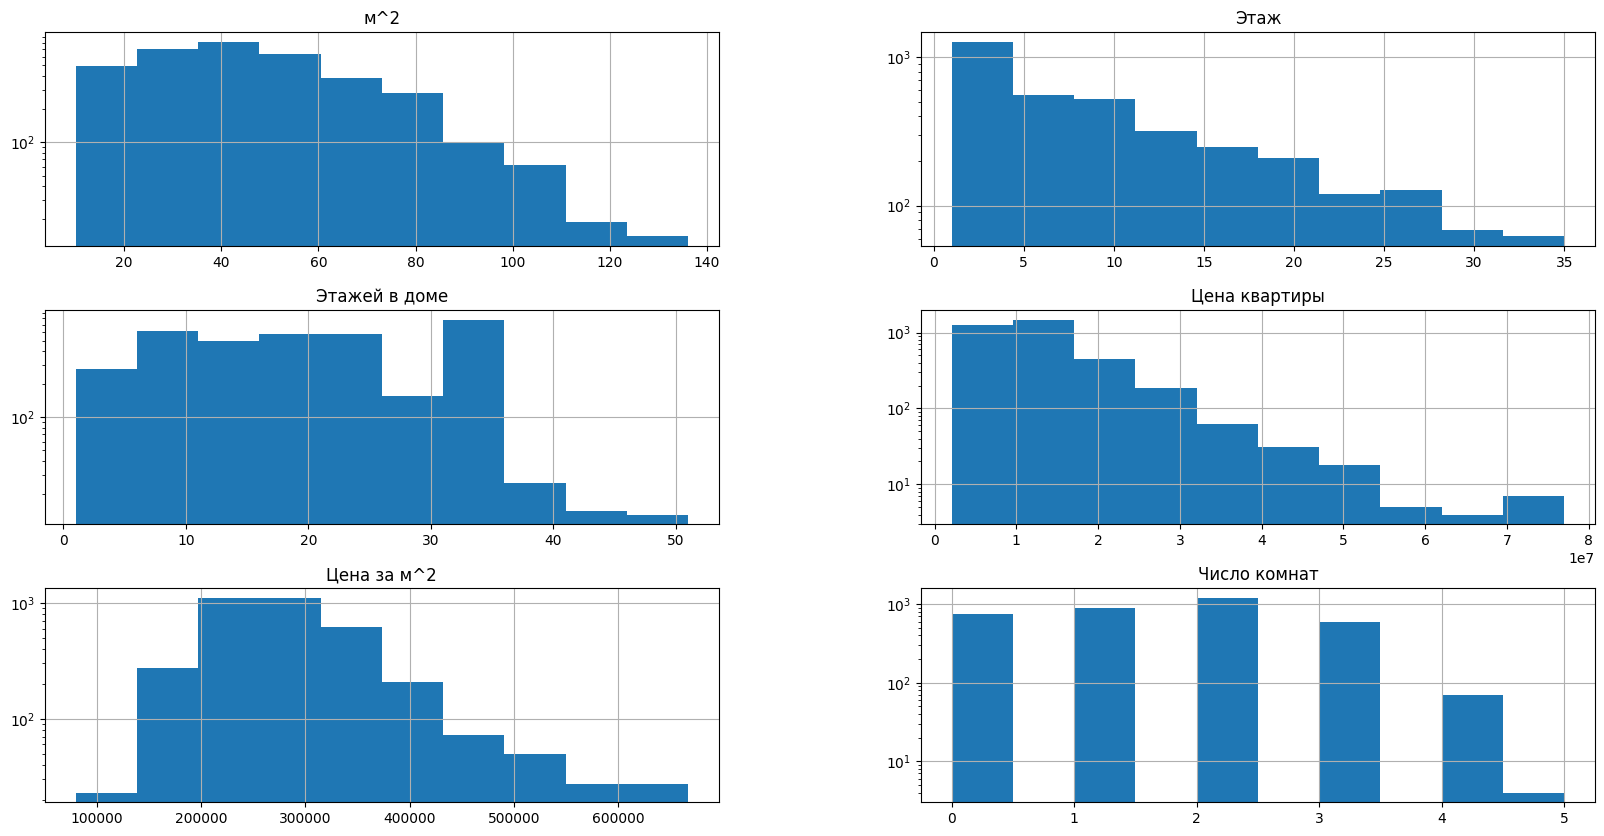

In [24]:
df_2[numeric_columns].hist(figsize=(20, 10), log=True)

***Видим, что мы действительно снизили влияние анамалий***

### Построим корреляционную матрицу

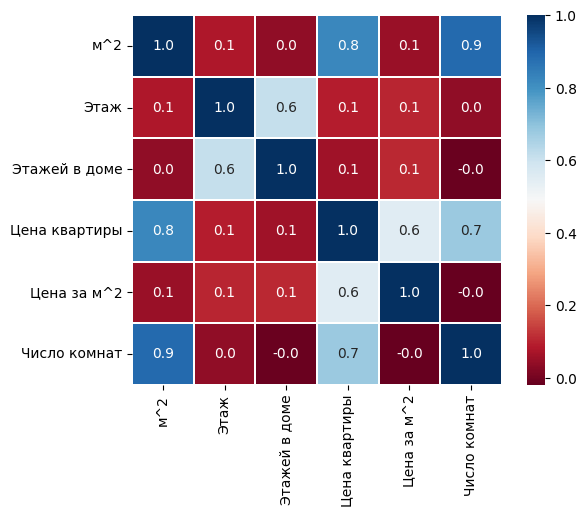

In [25]:
sns.heatmap(df_2[numeric_columns].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

***Из нашей матрицы видим, что цена квартиры коррелирует с площадью, числом комнат и ценой за м^2***
***Также очевидна корреляция числа комнат и плозади (что не удивительно) и этажности с общим числом этажей в доме***

### Посмотрим на то, как влияют окна на цену квартиры при одинаковом метраже. Для этого сделаем следующие графики:

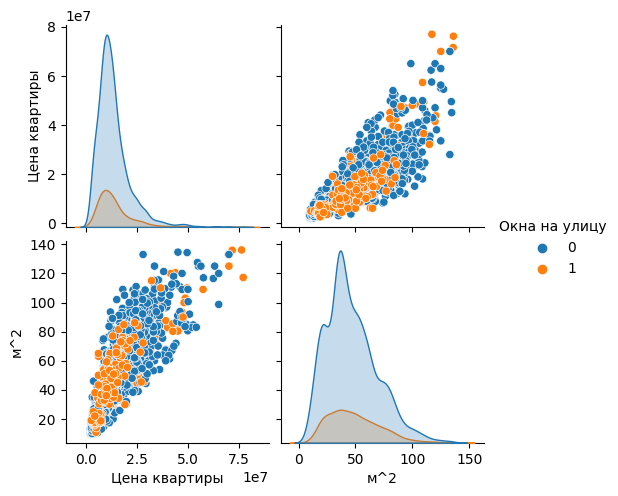

In [26]:
columns = ['Цена квартиры', 'м^2', 'Окна на улицу']
sns.pairplot(df_2[columns], hue='Окна на улицу');

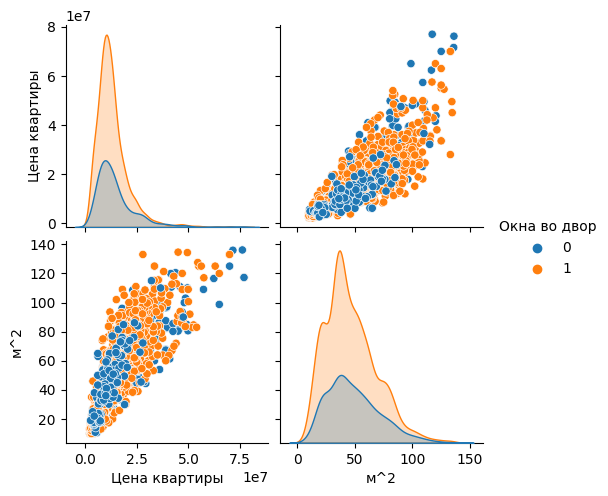

In [27]:
columns = ['Цена квартиры', 'м^2', 'Окна во двор']
sns.pairplot(df_2[columns], hue='Окна во двор');

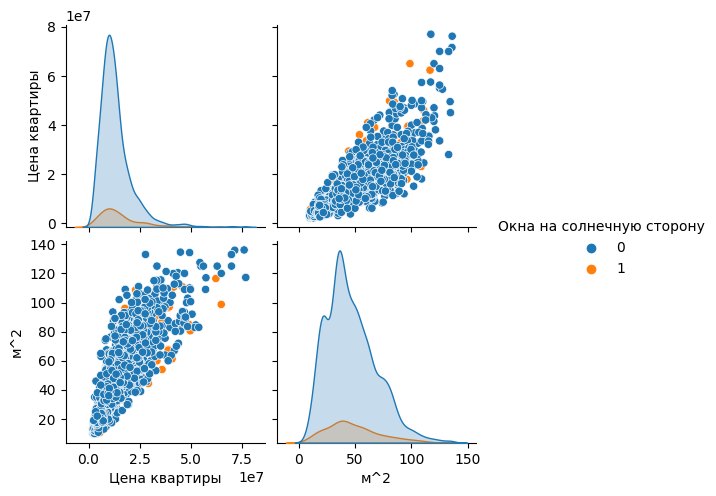

In [28]:
columns = ['Цена квартиры', 'м^2', 'Окна на солнечную сторону']
sns.pairplot(df_2[columns], hue='Окна на солнечную сторону');

***Можем заметить, что, вероятно, окна во двор ценятся больше, чем окна на улицу при прочих равных (возможно, это связано с уровнем внешнего шума)***

### Гипотезы

Исследуя графики, видим, что есть положительная зависимость цены квартиры от м^2, числа комнат и окон во двор.

Сформулируем наши гипотезы: 
1. Чем больше площадь, тем выше стоимость квартиры.
2. Если в квартире окна выходят во двор, она стоит дороже.
3. Чем больше в квартире жилых комнат, тем больше она ценится.

 __Про ML:__ В наших данных есть переменная - цена квартиры, которую мы будем попробовать предсказать. Целевая переменная может принимать любые значения, поэтому мы собираемся делать линейную регрессию.